# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice = mouse_study_df["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate Mouse ID and Timepoint combinations
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract unique Mouse IDs from duplicate_mice DataFrame
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Display the duplicate Mouse IDs
duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids_data = mouse_study_df.loc[mouse_study_df['Mouse ID'] == duplicate_mouse_ids[0]]
duplicate_mouse_ids_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df.loc[mouse_study_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
number_of_mice = len(clean_mice)
number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_tumor_mean = clean_df.groupby('Drug Regimen').mean(numeric_only=True)["Tumor Volume (mm3)"]
regimen_tumor_median = clean_df.groupby('Drug Regimen').median(numeric_only=True)["Tumor Volume (mm3)"]
regimen_tumor_var = clean_df.groupby ('Drug Regimen').var(numeric_only=True)["Tumor Volume (mm3)"]
regimen_tumor_std = clean_df.groupby ('Drug Regimen').std(numeric_only=True)["Tumor Volume (mm3)"]
regimen_tumor_sem = clean_df.groupby ('Drug Regimen').sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
stat_summary = pd.DataFrame({'Mean of Tumor-Volume':regimen_tumor_mean,
                                   'Median of Tumor-Volume':regimen_tumor_median,
                                 'Variance of Tumor-Volume':regimen_tumor_var,
                       'Standard deviation of TumorVolume':regimen_tumor_std,
                                      'Std Err of Tumor-Volume':regimen_tumor_sem})
stat_summary

,Mean of Tumor-Volume,Median of Tumor-Volume,Variance of Tumor-Volume,Standard deviation of TumorVolume,Std Err of Tumor-Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_df.groupby(['Drug Regimen'])[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

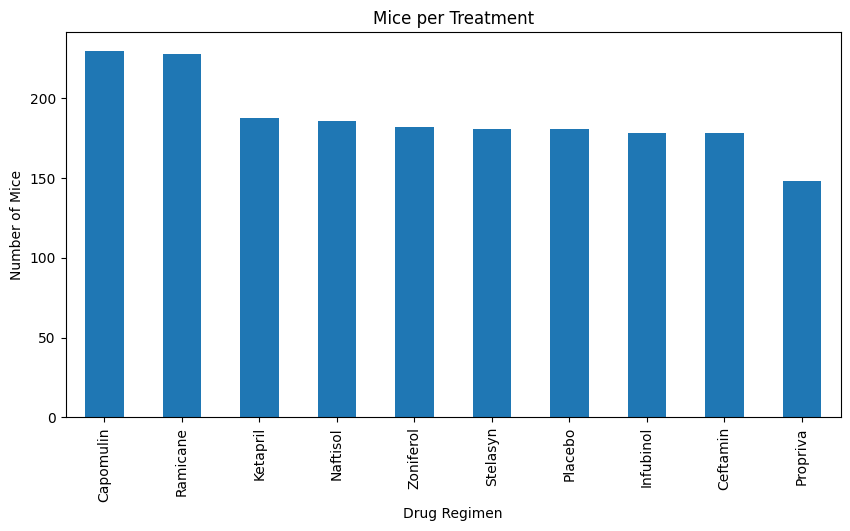

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_mouse = clean_df["Drug Regimen"].value_counts()
pandas_plot = total_mouse.plot(kind="bar", figsize=(10,5))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice per Treatment")

total_mouse

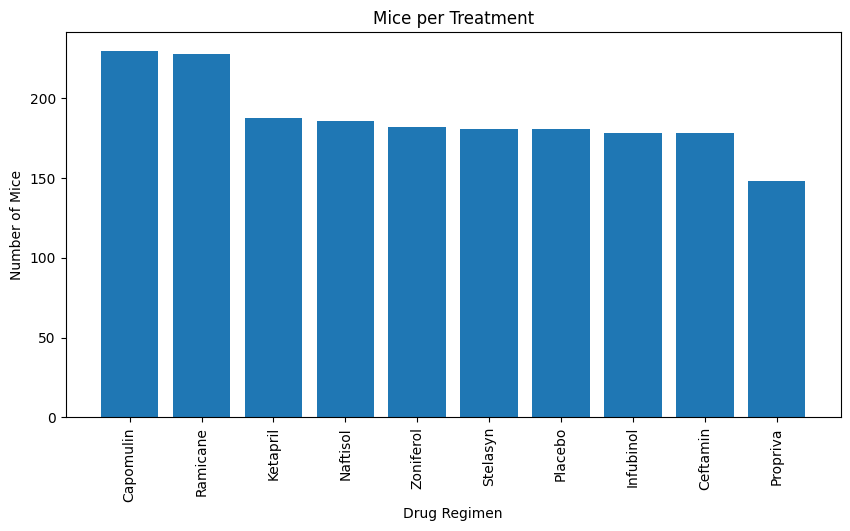

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = total_mouse.index.values
y_axis = total_mouse.values

plt.figure(figsize=(10,5))
plt.bar(x_axis,y_axis, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice per Treatment")
plt.xticks(rotation="vertical")


plt.show()
y_axis

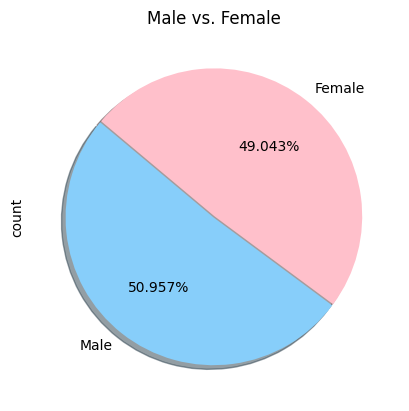

Sex
Male      958
Female    922
Name: count, dtype: int64

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
explode= (.01,0) #<--- this must be the number of items that you are identifying
colors=["lightskyblue","pink"]

sex_data = clean_df["Sex"].value_counts()
sex_data.plot.pie(explode=explode, colors=colors,autopct="%1.3f%%", shadow=True, startangle =140)
               
plt.title("Male vs. Female")
plt.show()
sex_data

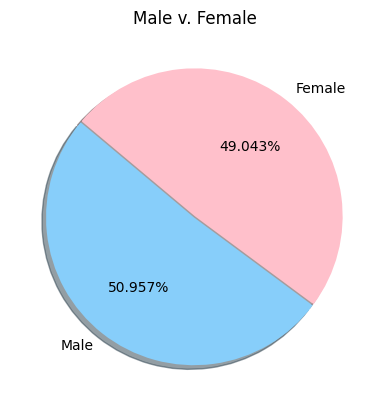

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958,922]
colors=["lightskyblue","pink"]
explode=[.01,0]
          
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.3f%%", shadow=True, startangle=140)

plt.title("Male v. Female")
plt.axis=("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mousev
timepoint_max = mouse_study_df.groupby(["Mouse ID"]).max()
mouse_index_reset = timepoint_max.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = mouse_index_reset[['Mouse ID','Timepoint']].merge(mouse_study_df,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    # Capomulin, Ramicane, Infubinol, and Ceftamin
drug_names = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

drug_list_combined= mouse_study_df[mouse_study_df["Drug Regimen"].isin(drug_names)]
# Start by getting the last (greatest) timepoint for each mouse
timepoint_group = drug_list_combined.groupby(["Drug Regimen","Mouse ID"]).agg(tumor_volume=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
        #last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
        #last_timepoint_df = timepoint_group.agg(lambda x: x.iloc[-1])
        #last_timepoint_df = timepoint_group.agg(lambda x: x.iloc[-1])
timepoint_group_df = timepoint_group.stack(level=0).unstack(level=0)
      
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_group

tumor_volume
Drug Regimen Mouse ID              
Capomulin    b128         38.982878
             b742         38.939633
             f966         30.485985
             g288         37.074024
             g316         40.159220
...                             ...
Ramicane     s508         30.276232
             u196         40.667713
             w678         43.166373
             y449         44.183451
             z578         30.638696

[100 rows x 1 columns]

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_list = []

for x in treatment_list:
    box_list.append(list(timepoint_group_df[x].dropna()))
    
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')
fig, ax1 = plt.subplots(figsize=(7,6))
ax1.set_title("Final Tumor Volume of Each Mouse Across 4 Regimens")
ax1.set_xlabel("Drug Regimens of Interest")
ax1.set_ylabel("Tumor Vol. (mm3)")
ax1.boxplot(box_list, notch=False, flierprops=flierprops)
plt.xticks([1,2,3,4], treatment_list)

plt.show()

NameError: name 'treatment_list' is not defined

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="royalblue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="royalblue")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],
                          avg_capm_vol['Tumor Volume (mm3)'])
print(f "The correlation between mouse weight and the average tumor volume is 
      {round(correlation[0],2)}")


(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"


plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='royalblue')
plt.plot(avg_capm_vol["Weight (g)"],regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()